# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.weightstats as ws
%matplotlib inline
sns.set()

In [8]:
HumanTempData = pd.read_csv('data/human_body_temperature.csv')

In [9]:
HumanTempData.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [10]:
def getNumBins(numObs):
    num_bins = (int((1 + 3.322 * np.log(numObs))/5)+1)*5
    return num_bins

## 1. Data Distribution

bins =  20


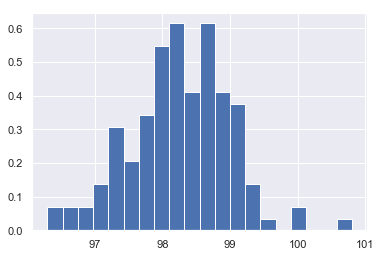

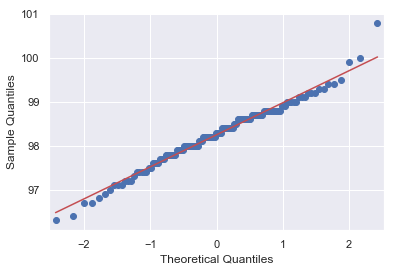

In [11]:
bins = getNumBins(len(HumanTempData))
print('bins = ',bins)
plt.hist(HumanTempData['temperature'],density=1,bins=bins)
qqplot(HumanTempData['temperature'],line='s')
plt.show()

#### Hypothesis:
H<sub>0</sub> : Data is not normally distributed<br>
H<sub>a</sub> : Data is normally distributed

In [12]:
stat,p = st.shapiro(HumanTempData['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
# interpret
if p > alpha:
    print('Fail to reject H0: Data is normally distributed')
else:
    print('Reject H0: Data is NOT normally distributed')

Statistics=0.987, p=0.233
Fail to reject H0: Data is normally distributed


#### Conclusion 
The histogram, QQ plot, and stats above suggest that the data is normally distributed.

## 2. Sample Size

In [13]:
true_mu = 98.6
alpha = 0.05  #significance
num_of_iterations = 10000
n = len(HumanTempData)
print(np.mean(HumanTempData['temperature']))
print(np.std(HumanTempData['temperature']))
print(n)

98.24923076923078
0.7303577789050377
130


#### Conclusion:
Sample size is 130 observations, which is a good size for sampling. A sample size of >30 observations is considered large.

The sample can be considered independent due to following reasons:
* Since the body temperature is independent between difference humans, and even within the same human being taken at 2 different times, the observations can be considered independent observations. 
* Considering the total population in the world, a sample of 130 observations is miniscule and satisfies the <10% of population condition.

## Hypothesis
H<sub>0</sub> : Mean body temperature = 98.6&#8457;<br>
H<sub>a</sub> : Mean body temperature <> 98.6&#8457;

## 3. True temperature mean = 98.6&#8457;?
### Bootstrap approach
Bootstrap approach draws numerous random samples from the orignal sample thereby increasing the sample size and helping the data approach true random distribution as per Central Limit Theorem

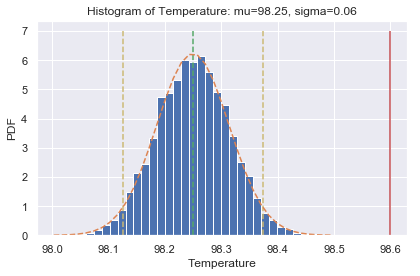

Mean body temperature =  98.2
Margin of Error = +/- 0.12
95% Confidence interval = [98.13 98.37]
Stated true mean body temperature =  98.6
Probability that body temperature <= stated true mean (p) = 0.0
Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT from the true mean of body temperature; true_mean <> 98.6


In [14]:
MeanOfSamples = np.empty(num_of_iterations)

for i in range(num_of_iterations):
    MeanOfSamples[i] = np.mean(np.random.choice(a=HumanTempData['temperature'],size=len(HumanTempData['temperature']),replace=True))

mu = np.mean(MeanOfSamples)
sigma = np.std(MeanOfSamples)
num_bins = getNumBins(len(MeanOfSamples))

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(MeanOfSamples, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Temperature')
ax.set_ylabel('PDF')
ax.set_title('Histogram of Temperature: mu='+str(round(mu,2))+', sigma='+str(round(sigma,2))) #+'; True mu = '+str(true_mu)
ax.vlines(mu,0,7,colors='g',linestyles='dashed')
ax.vlines(np.percentile(MeanOfSamples,[2.5,97.5]),0,7,colors='y',linestyles='dashed')
ax.vlines(true_mu,0,7,colors='r')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

p = np.sum(MeanOfSamples>=true_mu)/num_of_iterations

print('Mean body temperature = ',round(mu,1))
print('Margin of Error = +/-',2*round(sigma,2))
print('95% Confidence interval =',np.round(np.percentile(MeanOfSamples,[2.5,97.5]),2))
print('Stated true mean body temperature = ',true_mu)
print('Probability that body temperature <= stated true mean (p) =',p)

if p > alpha:
    print('Fail to reject H0: The data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT from the true mean of body temperature; true_mean = 98.6')
else:
    print('Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT from the true mean of body temperature; true_mean <> 98.6')

#### Conclusion
Based on the observations above using bootstrap methodology, and hypothesis testing, we can reject H<sub>0</sub> and conclude that true mean of body temperature <> 98.6&#8457;

### Frequentist Approach
Bootstrapping approach draws random samples with replacement within one sample, producing complete normal curve according to Central Limit Theorem.

Frequentist approach on the other hand constructs the 95% confidence using the original sample.

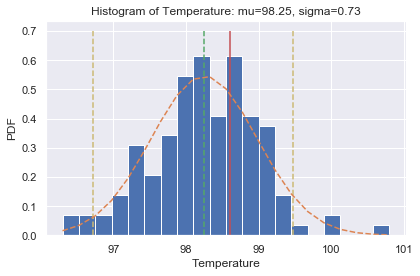

49
130
0.3769230769230769
Mean body temperature =  98.2
Margin of Error = +/- 1.46
95% Confidence interval = [96.72 99.48]
Stated true mean body temperature =  98.6
Probability that body temperature <= stated true mean (p) = 0.3769230769230769
Fail to reject H0: The data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT from the true mean of body temperature; true_mean = 98.6
-5.4548232923645195 4.9021570141012155e-08


In [21]:
mu = np.mean(HumanTempData['temperature'])
sigma = np.std(HumanTempData['temperature'])
num_bins = getNumBins(len(HumanTempData['temperature']))

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(HumanTempData['temperature'], num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Temperature')
ax.set_ylabel('PDF')
ax.set_title('Histogram of Temperature: mu='+str(round(mu,2))+', sigma='+str(round(sigma,2))) #+'; True mu = '+str(true_mu)
ax.vlines(mu,0,0.7,colors='g',linestyles='dashed')
ax.vlines(np.percentile(HumanTempData['temperature'],[2.5,97.5]),0,0.7,colors='y',linestyles='dashed')
ax.vlines(true_mu,0,0.7,colors='r')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

p = np.sum(HumanTempData['temperature']>=true_mu)/len(HumanTempData['temperature'])
print(np.sum(HumanTempData['temperature']>=true_mu))
print(len(HumanTempData['temperature']))
print(p)


print('Mean body temperature = ',round(mu,1))
print('Margin of Error = +/-',2*round(sigma,2))
print('95% Confidence interval =',np.round(np.percentile(HumanTempData['temperature'],[2.5,97.5]),2))
print('Stated true mean body temperature = ',true_mu)
print('Probability that body temperature <= stated true mean (p) =',p)

if p > alpha:
    print('Fail to reject H0: The data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT from the true mean of body temperature; true_mean = 98.6')
else:
    print('Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT from the true mean of body temperature; true_mean <> 98.6')    


#### Conclusion
Based on the observations above using frequentist methodology, and hypothesis testing, the true mean falls within the 95% confidence interval and has a p-value of 0.37, which is greater than the significant probability of 0.05. So we fail to reject H<sub>0</sub> and conclude that true mean of body temperature = 98.6&#8457;

The difference in the conclusion is due to the sample size. The bootstrap approach produces 10000 random samples, which decreases the margin of error by a great extent, decreasing the 95% confidence interval. The smaller sample size of 130 in frequentist approach compared to 10000 in bootstrap approach.

One Sample vs two sample: In this case we used one sample analysis because we considered all the observations as one sample. If we were to analyze the body temperature between male and female, that would be a two sample test

### t vs z
t-statistic would be more credible for smaller sample sizes (<30) since it considers the sample size (degrees of freedom) and provides appropriate measure based on the sample size. <br>
In this case, with a sample size of 130 (>30), t or z statistic would give close results. With large sample sizes, it's preferable to use z statistic. 

95% confidence t = 1.978524491458605
95% confidence z = 1.959963984540054
95% confidence interval using t stat =  [96.80420001613984, 99.69426152232171]
95% confidence interval using z stat =  [96.81775582674824, 99.68070571171332]


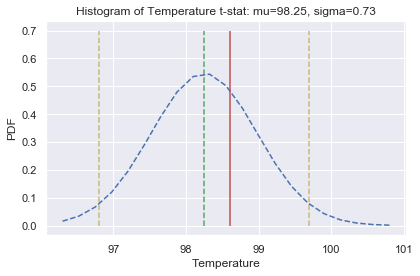

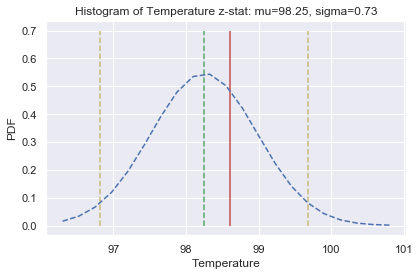

In [16]:
#Get t and z values for 95% confidence interval
t = st.t.ppf(0.975,len(HumanTempData['temperature'])-1)
z = st.norm.ppf(0.975)
print('95% confidence t =',t)
print('95% confidence z =',z)

t_95 = [mu-t*sigma, mu+t*sigma]
z_95 = [mu-z*sigma, mu+z*sigma]

print('95% confidence interval using t stat = ',t_95)
print('95% confidence interval using z stat = ',z_95)

fig, ax = plt.subplots()

# the histogram of the data
#n, bins, patches = ax.hist(HumanTempData['temperature'], num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Temperature')
ax.set_ylabel('PDF')
ax.set_title('Histogram of Temperature t-stat: mu='+str(round(mu,2))+', sigma='+str(round(sigma,2))) #+'; True mu = '+str(true_mu)
ax.vlines(mu,0,0.7,colors='g',linestyles='dashed')
ax.vlines(t_95,0,0.7,colors='y',linestyles='dashed')
ax.vlines(true_mu,0,0.7,colors='r')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.plot(bins, y, '--')
ax.set_xlabel('Temperature')
ax.set_ylabel('PDF')
ax.set_title('Histogram of Temperature z-stat: mu='+str(round(mu,2))+', sigma='+str(round(sigma,2))) #+'; True mu = '+str(true_mu)
ax.vlines(mu,0,0.7,colors='g',linestyles='dashed')
ax.vlines(z_95,0,0.7,colors='y',linestyles='dashed')
ax.vlines(true_mu,0,0.7,colors='r')


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()



#### Conclusion
As seen above, the 95% confidence intervals between t-stat and z-stat are almost identical and the true mean of 98.6&#8457; falls within the confidence interval of both the tests.

## 4. Small sample size of 10

### t vs z for a sample size of 10
As stated above, t statistic is more efficient for smaller samples with size < 30. In this case with a sample size of 10, t statistic will give a better margin of error.

95% confidence t = 2.2621571627409915
95% confidence z = 1.959963984540054
95% confidence interval using t stat =  [96.87785603564583, 100.08214396435417]
95% confidence interval using z stat =  [97.09188050065559, 99.86811949934442]


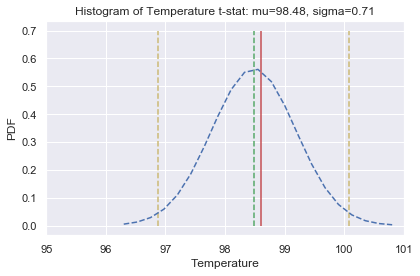

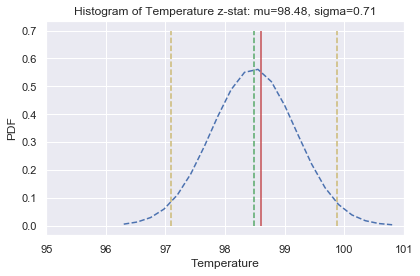

In [22]:
#Get t and z values for 95% confidence interval
data = np.random.choice(HumanTempData['temperature'],size=10)

mu = np.mean(data)
sigma = np.std(data)
num_bins = getNumBins(len(data))

t = st.t.ppf(0.975,len(data)-1)
z = st.norm.ppf(0.975)
print('95% confidence t =',t)
print('95% confidence z =',z)

t_95 = [mu-t*sigma, mu+t*sigma]
z_95 = [mu-z*sigma, mu+z*sigma]

print('95% confidence interval using t stat = ',t_95)
print('95% confidence interval using z stat = ',z_95)

fig, ax = plt.subplots()

# the histogram of the data
#n, bins, patches = ax.hist(HumanTempData['temperature'], num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Temperature')
ax.set_ylabel('PDF')
ax.set_title('Histogram of Temperature t-stat: mu='+str(round(mu,2))+', sigma='+str(round(sigma,2))) #+'; True mu = '+str(true_mu)
plt.xlim(95,101)
ax.vlines(mu,0,0.7,colors='g',linestyles='dashed')
ax.vlines(t_95,0,0.7,colors='y',linestyles='dashed')
ax.vlines(true_mu,0,0.7,colors='r')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.plot(bins, y, '--')
ax.set_xlabel('Temperature')
ax.set_ylabel('PDF')
ax.set_title('Histogram of Temperature z-stat: mu='+str(round(mu,2))+', sigma='+str(round(sigma,2))) #+'; True mu = '+str(true_mu)
plt.xlim(95,101)
ax.vlines(mu,0,0.7,colors='g',linestyles='dashed')
ax.vlines(z_95,0,0.7,colors='y',linestyles='dashed')
ax.vlines(true_mu,0,0.7,colors='r')


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


#### Conclusion
As evidenced above, using t-statistic for smaller samples produces bigger margin of error and wider 95% confidence intervals. So for analysis of smaller samples of size <30, one can be more confident with the results by using t-statistic.

## 5. Abnormal Temperature
### Bootstrap Approach

In [25]:
MeanOfSamples = np.empty(num_of_iterations)

for i in range(num_of_iterations):
    MeanOfSamples[i] = np.mean(np.random.choice(a=HumanTempData['temperature'],size=len(HumanTempData['temperature']),replace=True))

mu = np.mean(MeanOfSamples)
sigma = np.std(MeanOfSamples)
num_bins = getNumBins(len(MeanOfSamples))

#Using t stat:
t_95 = [mu-st.t.ppf(0.975,df=num_of_iterations-1)*sigma, mu+st.t.ppf(0.975,df=num_of_iterations-1)*sigma]

#Using z stat:
z_95 = [mu-st.norm.ppf(0.975)*sigma, mu+st.norm.ppf(0.975)*sigma]

#Using np percentile
perc_95 = np.percentile(MeanOfSamples,[2.5,97.5])

print('95% Confidence interval using t-stat: ',t_95)
print('95% Confidence interval using z-stat: ',z_95)
print('95% Confidence interval using percentile method: ',perc_95)

95% Confidence interval using t-stat:  [98.12389408482753, 98.37632468440327]
95% Confidence interval using z-stat:  [98.12390936297825, 98.37630940625255]
95% Confidence interval using percentile method:  [98.12461538 98.37384615]


Bootstrap methodology allows for an increase in sample size - 10,000 in this case, there by decreasing the margin of error. So we observe that bootstrap method gives a very narrow margin of error suggesting that any temperature beyond 98.12&#8457; - 98.37&#8457; is abnormal.

### Frequentist Approach

In [24]:
mu = np.mean(HumanTempData['temperature'])
sigma = np.std(HumanTempData['temperature'])
num_bins = getNumBins(len(HumanTempData['temperature']))

#Using t stat:
t_95 = [mu-st.t.ppf(0.975,df=len(HumanTempData['temperature'])-1)*sigma, mu+st.t.ppf(0.975,df=len(HumanTempData['temperature'])-1)*sigma]
t_moe = st.t.ppf(0.975,df=len(HumanTempData['temperature'])-1)*sigma

#Using z stat:
z_95 = [mu-st.norm.ppf(0.975)*sigma, mu+st.norm.ppf(0.975)*sigma]
z_moe = st.norm.ppf(0.975)*sigma

#Using np percentile
perc_95 = np.percentile(HumanTempData['temperature'],[2.5,97.5])

print('95% Confidence interval using t-stat: ',t_95)
print('95% Confidence interval using z-stat: ',z_95)
print('95% Confidence interval using percentile method: ',perc_95)

95% Confidence interval using t-stat:  [96.80420001613984, 99.69426152232171]
95% Confidence interval using z-stat:  [96.81775582674824, 99.68070571171332]
95% Confidence interval using percentile method:  [96.7225 99.4775]


Frequentist methodology lets us work with the original sample, keeping the sample size limited to whatever is available - 130 in this case. Due to a relatively smaller sample size compared to bootstrap's 10000, frequentist approach gives a wider confidence interval and higher margin of error, making temperatures beyond 96.8&#8457; and 99.7&#8457; abnormal.

#### Conclusion
As evidence above, frequentist methodology gives a wider confidence interval. However, carefully choosing the number of iterations in bootstrap methodology may provide similar/better results. 

## 6. Male vs Female temperature
### Hypothesis
H<sub>0</sub> : Mean body temperature of males = Mean body temperature of females<br>
H<sub>a</sub> : Mean body temperature of males <> Mean body temperature of females
#### Approach
In this case, we use two sample test to test the difference of means betweens samples of male and female body temperatures

In [49]:
def draw_bs_replicates(data,func,size):
    bs_replicate = np.empty(size)
    for i in range(size):
        bs_replicate[i] = func(np.random.choice(data,len(data)))
        
    return bs_replicate

male_orig = HumanTempData.temperature[HumanTempData.gender=='M']
female_orig = HumanTempData.temperature[HumanTempData.gender=='F']
diff_mean = np.mean(female_orig)-np.mean(male_orig)
print('Number of male observations: ',len(male_orig))
print('Number of female observations: ',len(female_orig))
print('Difference of mean (female - male): ',diff_mean)

# Shifted mean method
print('Shifted mean method:')
male_shifted = male_orig - np.mean(male_orig) + mu
female_shifted = female_orig - np.mean(female_orig) + mu

bs_replicates_male = draw_bs_replicates(male_shifted,np.mean,num_of_iterations)
bs_replicates_female = draw_bs_replicates(female_shifted,np.mean,num_of_iterations)

p = np.sum((bs_replicates_female-bs_replicates_male)>=diff_mean)/num_of_iterations
print('    p-value using shifted mean bootstrap method:',p)

if p > alpha:
    print('    Fail to reject H0: The data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT between male and females; mean male temperature = mean female temperature')
else:
    print('    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between male and female temperatures; mean male temperature <> mean female temperature')
    
# Combined data method
print('Combined data simulation:')
np.random.seed(1)
perm_sample = np.random.permutation(HumanTempData.temperature)
male_combined = perm_sample[:65]
female_combined = perm_sample[65:]

p = np.sum(np.mean(female_combined)-np.mean(male_combined)>=diff_mean)/len(female_combined)
print('    p-value using combined data method:',p)

if p > alpha:
    print('    Fail to reject H0: The data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT between male and females; mean male temperature = mean female temperature')
else:
    print('    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between male and female temperatures; mean male temperature <> mean female temperature')



Number of male observations:  65
Number of female observations:  65
Difference of mean (female - male):  0.289230769230727
Shifted mean method:
    p-value using shifted mean bootstrap method: 0.0104
    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between male and female temperatures; mean male temperature <> mean female temperature
Combined data simulation:
    p-value using combined data method: 0.0
    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between male and female temperatures; mean male temperature <> mean female temperature


# Conclusion
The above tests prove certain aspects:
1. Choosing right sample size is key for any analysis. Greater sample size decreases the margin of error, and smaller sample size increases it.
2. Any temperature beyond 96.8&#8457; and 99.7&#8457; is abnormal
3. According to frequentist approach, the data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT from the true mean of body temperature, suggesing true_mean = 98.6&#8457;
4. Females have higher mean body temperatures that males do. 
5. Significant due diligance must be made prior to choosing bootstrap / frequentist approach as the results completely vary based on the chosen methodology